Preprocessing Pipeline
ICA
Low Pass Filter ERPs @ 10 Hz to remove jitters
uses a low pass filter on the ERPs to remove alpha oscillations using a cut off of 5Hz

In [1]:
from fn_cfg import *
import params as cfg

In [2]:
"Laurel Place Dataset"
localPath = '/Users/joshuaighalo/Downloads/brainNet_datasets/laurel_place/cleaned_dataset'
img_save_path = '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single_averages/2.0'
filename = '0002_1_12122019_1219'
version = 1.0
image_name = "Dementia Scan"
cutoff = cfg.lowPass

In [3]:
"Bruyere Dataset"
#version = 1.1
#filename = '1_1_04092018_1142'
#localPath = '/Users/joshuaighalo/Downloads/EEG_Datasets/bruyere'

'Bruyere Dataset'

In [4]:
"create a folder to store images produced"
shutil.rmtree(img_save_path, ignore_errors=True)
os.makedirs(img_save_path)

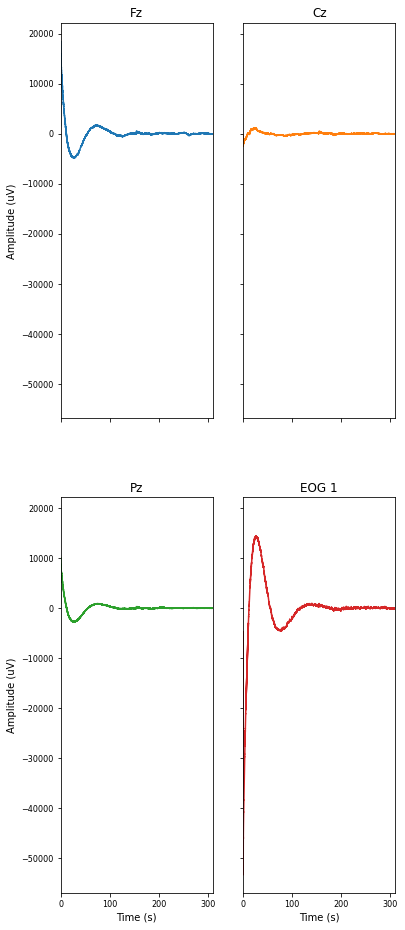

In [5]:
device = importFile.neurocatch()
fileObjects = device.init(version,filename,localPath,dispIMG=False)
rawEEG = fileObjects[0]
rawEOG = fileObjects[1]
rawEEGEOG = fileObjects[2]
time = fileObjects[3]
trigOutput = fileObjects[4]

plots(time,rawEEGEOG,titles=cfg.channelNames_1,figsize=cfg.figure_size,pltclr=cfg.plot_color_1)

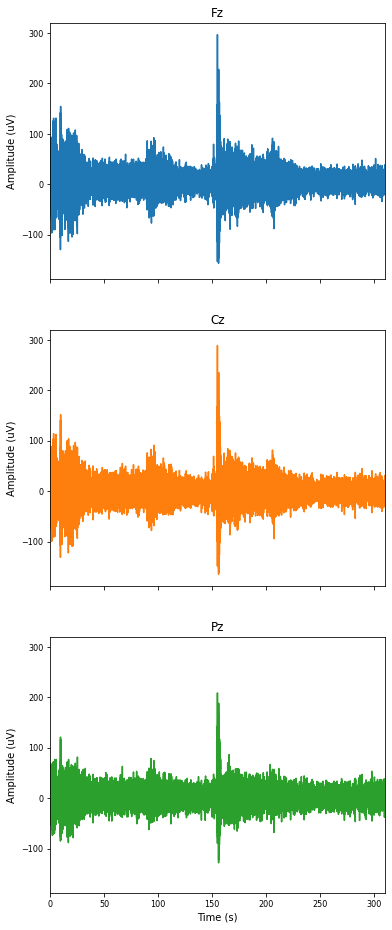

In [6]:
icaOutput = ica(rawEEG,cfg.fs)
plots(time,icaOutput,titles=cfg.channelNames_1,figsize=cfg.figure_size,pltclr=cfg.plot_color_1)

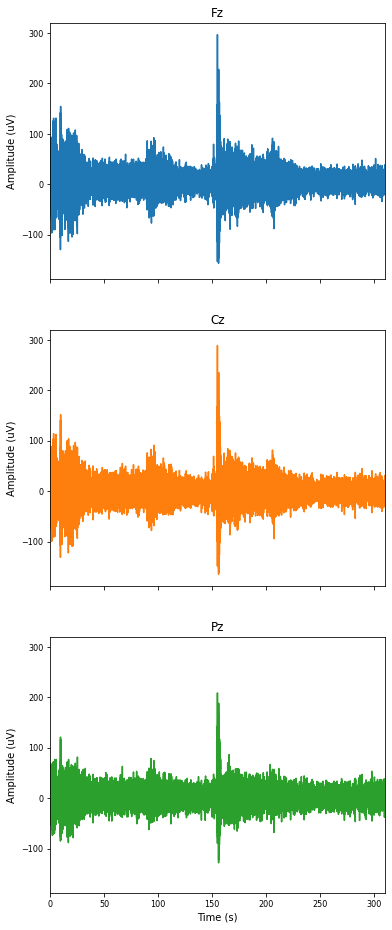

In [7]:
filtering = filters()
notchFilterOutput = filtering.notch(icaOutput,line,fs)
plots(time,icaOutput,titles=cfg.channelNames,figsize=cfg.figure_size,pltclr=cfg.plot_color)

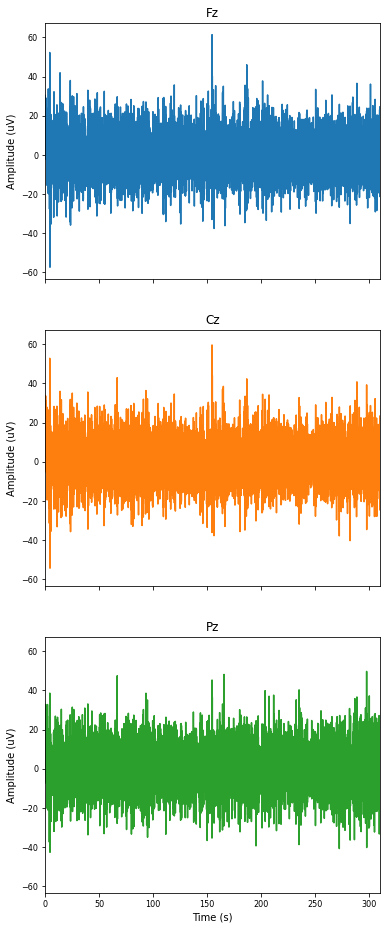

In [8]:
bandPassFilterOutput = filtering.butterBandPass(notchFilterOutput,lowcut=cfg.highPass,highcut=cfg.lowPass,fs=cfg.fs)
plots(time,bandPassFilterOutput,titles=cfg.channelNames,figsize=cfg.figure_size,pltclr=cfg.plot_color)

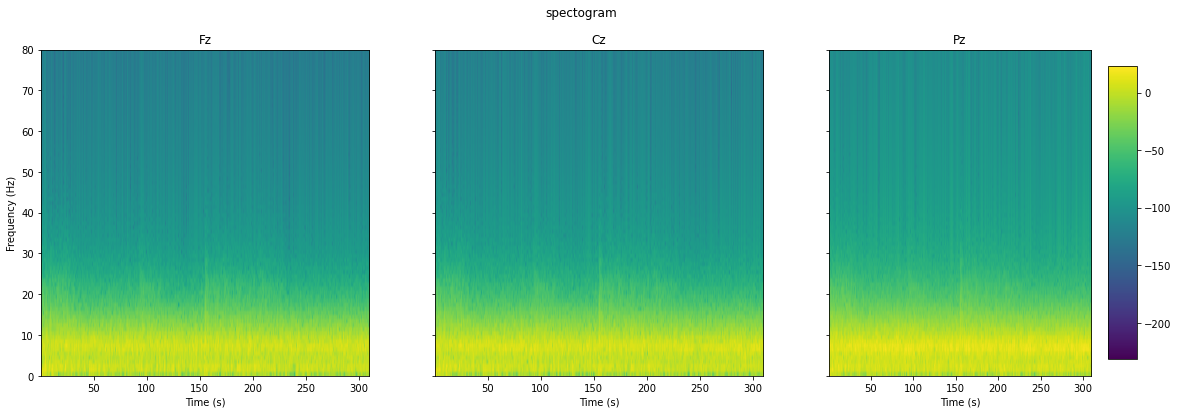

In [9]:
spectogramPlot(bandPassFilterOutput,fs=cfg.fs,nfft=cfg.nfft,y_max=80,nOverlap=cfg.noverlap,figsize=(20,6),subTitles=cfg.channelNames,title="spectogram")

In [10]:
erps = erpExtraction()
N1P3 = erps.N100P300(chanNames=cfg.channelNames,scanID=filename,trigger_channel=trigOutput,eegData=bandPassFilterOutput,period=time,stimTrig=cfg.stimTrig,clip=cfg.clip,dispIMG=False)
N4 = erps.N400(chanNames=cfg.channelNames,scanID=filename,trigger_channel=trigOutput,eegData=bandPassFilterOutput,period=time,stimTrig=cfg.stimTrig,clip=cfg.clip,dispIMG=False)
N1P3_Fz = N1P3[0]
N1P3_Cz = N1P3[1]
N1P3_Pz = N1P3[2]
N4_Fz = N4[0]
N4_Cz = N4[1]
N4_Pz = N4[2]
erp_latency = np.array(np.linspace(start=-100, stop=900, num=len(N1P3_Fz[0]),dtype=object),dtype=object)

In [11]:
#   Application of low pass filter to remove Jitters and alpha oscillations
#   set cutoff of lowpass value of band pass filter  to remove jitters
#   set cutoff of lowpass value to 5Hz to remove alpha oscillations
dev_Fz = filtering.butter_lowpass(N1P3_Fz[1],cutoff=cutoff,fs=cfg.fs,order=4)
std_Fz = filtering.butter_lowpass(N1P3_Fz[0],cutoff=cutoff,fs=cfg.fs,order=4)
dev_Cz = filtering.butter_lowpass(N1P3_Cz[1],cutoff=cutoff,fs=cfg.fs,order=4)
std_Cz = filtering.butter_lowpass(N1P3_Cz[0],cutoff=cutoff,fs=cfg.fs,order=4)
dev_Pz = filtering.butter_lowpass(N1P3_Pz[1],cutoff=cutoff,fs=cfg.fs,order=4)
std_Pz = filtering.butter_lowpass(N1P3_Pz[0],cutoff=cutoff,fs=cfg.fs,order=4)
inc_Fz = filtering.butter_lowpass(N4_Fz[1],cutoff=cutoff,fs=cfg.fs,order=4)
con_Fz = filtering.butter_lowpass(N4_Fz[0],cutoff=cutoff,fs=cfg.fs,order=4)
inc_Cz = filtering.butter_lowpass(N4_Cz[1],cutoff=cutoff,fs=cfg.fs,order=4)
con_Cz = filtering.butter_lowpass(N4_Cz[0],cutoff=cutoff,fs=cfg.fs,order=4)
inc_Pz = filtering.butter_lowpass(N4_Pz[1],cutoff=cutoff,fs=cfg.fs,order=4)
con_Pz = filtering.butter_lowpass(N4_Pz[0],cutoff=cutoff,fs=cfg.fs,order=4)

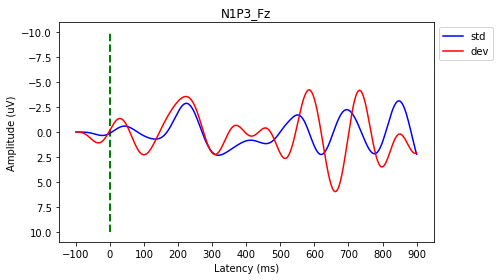

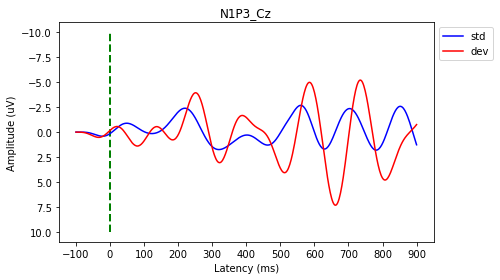

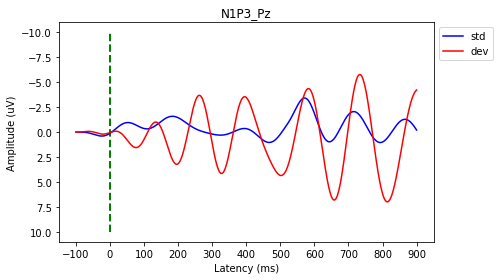

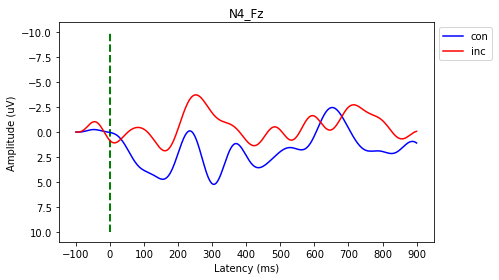

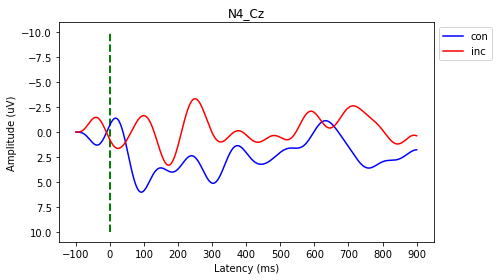

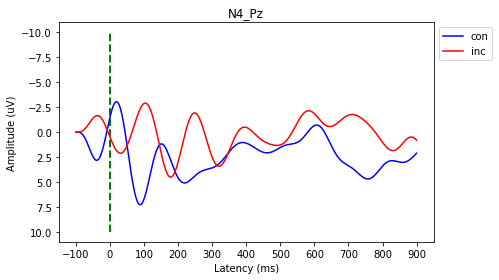

In [12]:
#   Plot ERPs
plot_ERPs(img_save_path,std_Fz,dev_Fz,erp_latency,'N1P3_Fz','Latency (ms)','Amplitude (uV)','std','dev','b','r',10,image_name)
plot_ERPs(img_save_path,std_Cz,dev_Cz,erp_latency,'N1P3_Cz','Latency (ms)','Amplitude (uV)','std','dev','b','r',10,image_name)
plot_ERPs(img_save_path,std_Pz,dev_Pz,erp_latency,'N1P3_Pz','Latency (ms)','Amplitude (uV)','std','dev','b','r',10,image_name)
plot_ERPs(img_save_path,con_Fz,inc_Fz,erp_latency,'N4_Fz','Latency (ms)','Amplitude (uV)','con','inc','b','r',10,image_name)
plot_ERPs(img_save_path,con_Cz,inc_Cz,erp_latency,'N4_Cz','Latency (ms)','Amplitude (uV)','con','inc','b','r',10,image_name)
plot_ERPs(img_save_path,con_Pz,inc_Pz,erp_latency,'N4_Pz','Latency (ms)','Amplitude (uV)','con','inc','b','r',10,image_name)